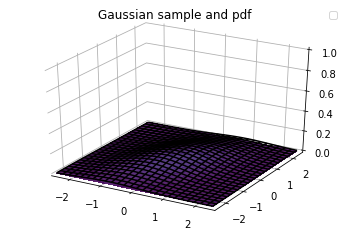

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal
import jax
from jax import random
from jax.scipy.stats.multivariate_normal import pdf

# Sample parameters
# mu = np.array([0, 0])
# sigma = np.array([[0.7, 0.2], [0.2, 0.3]])
# rv = multivariate_normal(mu, sigma)
key = random.PRNGKey(42)
mu = np.array([0, 0])
cov = np.array([[1, 3/5],[3/5, 2]])
sample = jax.random.multivariate_normal(key, mu, cov, (5000,)).T
sample = sample.reshape(2,5000)
# Bounds parameters
x_abs = 2.5
y_abs = 2.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# The heatmap
ax.contourf(x_grid, y_grid, 0.1 * pdf(pos,mu,cov),
            zdir='z', levels=0.1 * levels, alpha=0.9)

# The wireframe
ax.plot_wireframe(x_grid, y_grid, pdf(pos, mu,cov), rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
# ax.scatter(sample[:, 0], sample[:, 1], 1.05 * pdf(sample.reshape(5000,2), mu,cov).reshape(1,5000), c='k')
# ax.scatter(x_grid, y_grid, pdf(pos, mu,cov), c='g')
ax.legend()
ax.set_title("Gaussian sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)

plt.show()

In [ ]:
samples = jax.random.multivariate_normal(key, mu, cov, (5000,))


(5000,)

In [ ]:
sample[:, 0].shape

(2,)

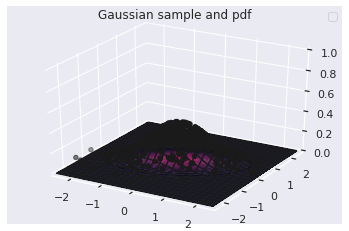

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import multivariate_normal


# Sample parameters
mu = np.array([0, 0])
sigma = np.array([[0.7, 0.2], [0.2, 0.3]])
rv = multivariate_normal(mu, sigma)
sample = rv.rvs(500)

# Bounds parameters
x_abs = 2.5
y_abs = 2.5
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.02, -y_abs:y_abs:.02]

pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid

levels = np.linspace(0, 1, 40)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# The heatmap
ax.contourf(x_grid, y_grid, 0.1 * rv.pdf(pos),
            zdir='z', levels=0.1 * levels, alpha=0.9)

# The wireframe
ax.plot_wireframe(x_grid, y_grid, rv.pdf(
    pos), rstride=10, cstride=10, color='k')

# The scatter. Note that the altitude is defined based on the pdf of the
# random variable
ax.scatter(sample[:, 0], sample[:, 1], 1.05 * rv.pdf(sample), c='k')

ax.legend()
ax.set_title("Gaussian sample and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 1)

plt.show()

In [ ]:
sample.shape

(500, 2)

In [ ]:
pos.shape

(250, 250, 2)

In [ ]:
rv.pdf(sample).shape

(500,)

In [ ]:
rv.pdf(pos).shape

(250, 250)

In [17]:
# Convert this to jax
mat_code = '''
%This script illustrates a multivariate Gaussian distribution and its
%marginal distributions

%This code is issued under the CC0 "license"

%Define limits of plotting
X = -5:0.1:5;
Y = -5:0.1:5;

%2-d Mean and covariance matrix
MeanVec = [0 0];
CovMatrix = [1 0.6; 0.6 2];

%Get the 1-d PDFs for the "walls"
Z_x = normpdf(X,MeanVec(1), sqrt(CovMatrix(1,1)));
Z_y = normpdf(Y,MeanVec(2), sqrt(CovMatrix(2,2)));

%Get the 2-d samples for the "floor"
Samples = mvnrnd(MeanVec, CovMatrix, 10000);

%Get the sigma ellipses by transform a circle by the cholesky decomp
L = chol(CovMatrix,'lower');
t = linspace(0,2*pi,100); %Our ellipse will have 100 points on it
C = [cos(t) ; sin(t)]; %A unit circle
E1 = 1*L*C; E2 = 2*L*C; E3 = 3*L*C; %Get the 1,2, and 3-sigma ellipses

figure; hold on; 
%Plot the samples on the "floor"
plot3(Samples(:,1),Samples(:,2),zeros(size(Samples,1),1),'k.','MarkerSize',2)
%Plot the 1,2, and 3-sigma ellipses slightly above the floor
%plot3(E1(1,:), E1(2,:), 1e-3+zeros(1,size(E1,2)),'Color','g','LineWidth',2);
%plot3(E2(1,:), E2(2,:), 1e-3+zeros(1,size(E2,2)),'Color','g','LineWidth',2);
plot3(E3(1,:), E3(2,:), 1e-3+zeros(1,size(E3,2)),'Color','g','LineWidth',2);

%Plot the histograms on the walls from the data in the middle
[n_x, xout] = hist(Samples(:,1),20);%Creates 20 bars
n_x = n_x ./ ( sum(n_x) *(xout(2)-xout(1)));%Normalizes to be a pdf
[~,~,~,x_Pos,x_Height] = makebars(xout,n_x);%Creates the bar points
plot3(x_Pos, Y(end)*ones(size(x_Pos)),x_Height,'-k')

%Now plot the other histograms on the wall
[n_y, yout] = hist(Samples(:,2),20);
n_y = n_y ./ ( sum(n_y) *(yout(2)-yout(1)));
[~,~,~,y_Pos,y_Height] = makebars(yout,n_y);
plot3(X(1)*ones(size(y_Pos)),y_Pos, y_Height,'-k')

%Now plot the 1-d pdfs over the histograms
plot3(X, ones(size(X))*Y(end), Z_x,'-b','LineWidth',2); 
plot3(ones(size(Y))*X(1), Y, Z_y,'-r','LineWidth',2);

%Make the figure look nice
grid on; view(45,55);
axis([X(1) X(end) Y(1) Y(end)])
'''

In [18]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
from jax.scipy.stats.multivariate_normal import pdf


In [ ]:
N = 10000
X = jnp.linspace(-5, 5, N)
Y = jnp.linspace(-5, 5, N)

In [ ]:
mu = jnp.array([0, 0])
cov = jnp.array([[1, 3/5],[3/5, 2]])
print(cov)

[[1.  0.6]
 [0.6 2. ]]


In [20]:
# Z_x = pdf(X,mu(1), (cov(1,1)));
# Z_y = pdf(Y,mu(2),(cov(2,2)));

from scipy.stats import norm
import scipy.stats as stats

In [21]:
#This script illustrates a multivariate Gaussian distribution and its
#marginal distributions



#Define limits of plotting
X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)
# print(X, Y)
# 2-d Mean and covariance matrix
MeanVec = [0,0]
CovMatrix = np.array([[1, 0.6], [0.6, 2]])

# Get the 1-d PDFs for the "walls"
Z_x = norm.pdf(X,MeanVec[0], np.sqrt(CovMatrix[0,0]))
Z_y = norm.pdf(Y,MeanVec[1], np.sqrt(CovMatrix[1,1]))
#Get the 2-d samples for the "floor"

# Samples = mvnrnd(MeanVec, CovMatrix, 10000);
Samples = stats.multivariate_normal.rvs(MeanVec, CovMatrix, 10000)
# Samples.shape
# Get the sigma ellipses by transform a circle by the cholesky decomp
L = np.linalg.cholesky(CovMatrix)
# print(L)
t = np.linspace(0,2*np.pi,100) #Our ellipse will have 100 points on it
C = [np.cos(t), np.sin(t)] #A unit circle
# Get the 1,2, and 3-sigma ellipses
E1 = 1*L*C
E2 = 2*L*C
E3 = 3*L*C
print(E3)

ValueError: ignored

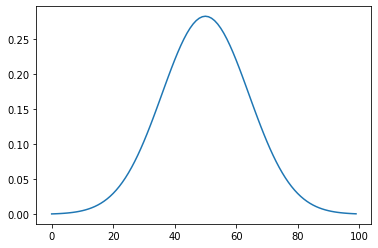

In [ ]:
plt.plot(Z_y)